In [36]:
###Data de Kaggle,,,Ayuda con Gemeni y chatgpt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [37]:

Data = pd.read_csv('training.csv.csv')

# Mostrar las primeras filas del DataFrame
print(Data.head())

   Epoch      loss  accuracy  F1_score  val_loss  val_accuracy  val_F1_score
0      1  5.226210   0.75290  0.665162  2.001779         0.938      0.929245
1      2  1.435009   0.94665  0.912901  0.975209         0.954      0.947070
2      3  0.857355   0.97130  0.956363  0.765548         0.960      0.953881
3      4  0.655860   0.98345  0.976639  0.679098         0.958      0.956769
4      5  0.539441   0.99065  0.986101  0.623349         0.954      0.954769


In [38]:
Data

,Epoch,loss,accuracy,F1_score,val_loss,val_accuracy,val_F1_score
0,1,5.226210,0.75290,0.665162,2.001779,0.938,0.929245
1,2,1.435009,0.94665,0.912901,0.975209,0.954,0.947070
2,3,0.857355,0.97130,0.956363,0.765548,0.960,0.953881
3,4,0.655860,0.98345,0.976639,0.679098,0.958,0.956769
4,5,0.539441,0.99065,0.986101,0.623349,0.954,0.954769
5,6,0.467418,0.99230,0.988818,0.544199,0.964,0.962712
6,7,0.404825,0.99415,0.991935,0.492052,0.962,0.962000
7,8,0.358726,0.99645,0.994503,0.455653,0.974,0.970872
8,9,0.327160,0.99615,0.994826,0.447779,0.966,0.967795
9,10,0.297498,0.99715,0.996272,0.466565,0.962,0.960974


Epoch 1/8
1/1 [==============================] - 2s 2s/step - loss: 3.5927 - accuracy: 0.0357 - val_loss: 4.3139 - val_accuracy: 0.0000e+00
Epoch 2/8
1/1 [==============================] - 1s 986ms/step - loss: 3.4581 - accuracy: 0.0357 - val_loss: 4.1057 - val_accuracy: 0.0000e+00
Epoch 3/8
1/1 [==============================] - 1s 983ms/step - loss: 3.2172 - accuracy: 0.1071 - val_loss: 4.4710 - val_accuracy: 0.0000e+00
Epoch 4/8
1/1 [==============================] - 1s 961ms/step - loss: 2.9672 - accuracy: 0.1429 - val_loss: 4.9811 - val_accuracy: 0.0000e+00
Epoch 5/8
1/1 [==============================] - 1s 1s/step - loss: 2.5516 - accuracy: 0.4286 - val_loss: 5.7840 - val_accuracy: 0.0000e+00
Epoch 6/8
1/1 [==============================] - 1s 1s/step - loss: 2.0311 - accuracy: 0.6786 - val_loss: 7.0212 - val_accuracy: 0.0000e+00
Epoch 7/8
1/1 [==============================] - 2s 2s/step - loss: 1.5162 - accuracy: 0.8214 - val_loss: 8.8625 - val_accuracy: 0.0000e+00
Epoch 8/8
1

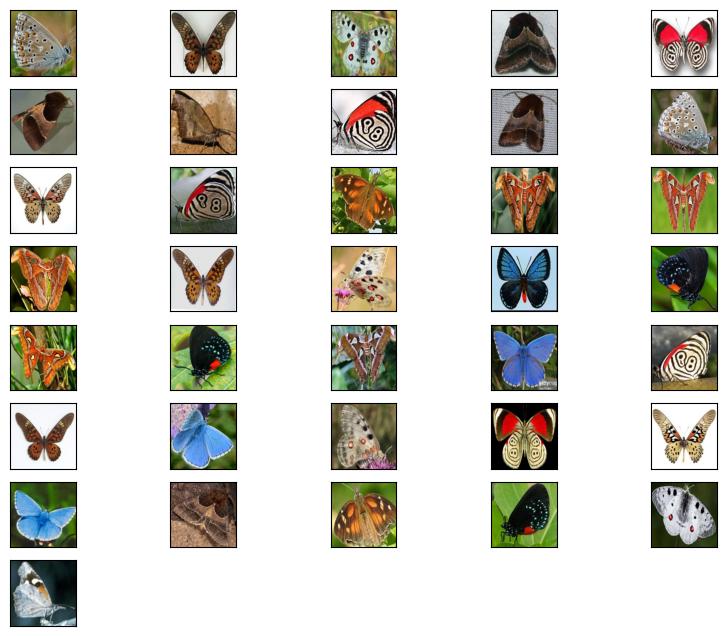

In [53]:
"https://levelup.gitconnected.com/deep-dive-classification-neural-networks-7e66ad5b259e"


# Directorio de las imágenes
image_dir = 'ADONIS'  # Reemplaza con la ruta correcta

# Cargar las imágenes y etiquetas
images = []
labels = []
for filename in os.listdir(image_dir):
  if filename.endswith('.jpg') or filename.endswith('.png'):
    img_path = os.path.join(image_dir, filename)
    img = Image.open(img_path).convert('RGB')
    img = img.resize((128, 128))
    img_array = np.array(img)
    images.append(img_array)


    label = filename.split('_')[0]
    labels.append(label)

# Convertir a arrays de NumPy
images = np.array(images)
labels = np.array(labels)

# Convertir etiquetas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Normalizar los valores de píxeles
images = images / 255.0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_))) # Set the number of classes

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Hacer predicciones en todas las imágenes
predictions = model.predict(images)

# Mostrar las imágenes con sus predicciones
plt.figure(figsize=(10, 8))
for i in range(len(images)):


  num_rows = int(np.ceil(len(images) / 5))
  plt.subplot(num_rows, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = labels[i]
  if predicted_label == true_label:
    color = 'green'


2/2 [==============================] - 0s 22ms/step


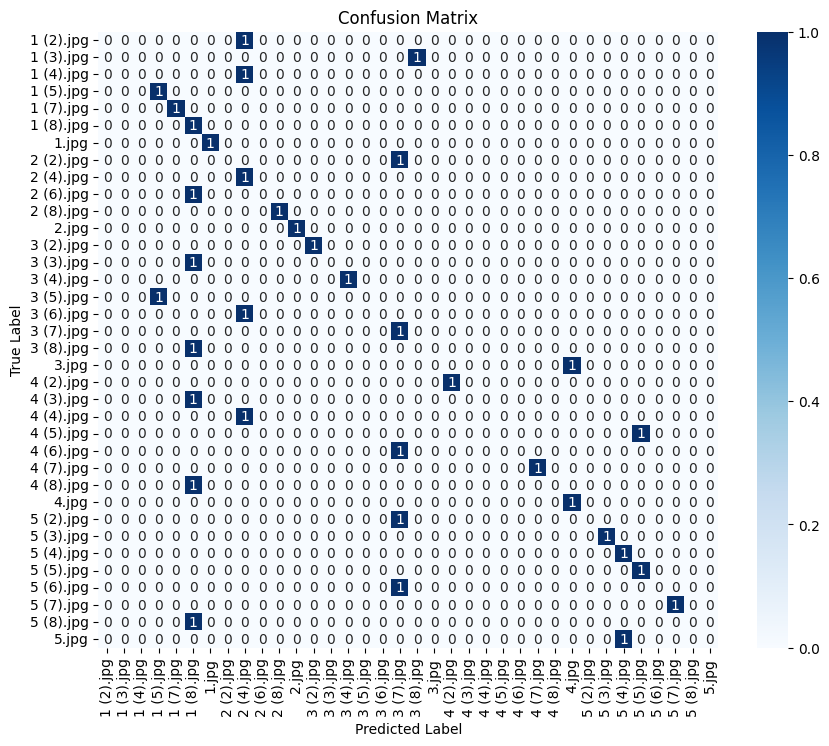

In [71]:
# Realizar predicciones en el conjunto de validación
predictions = model.predict(validation_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


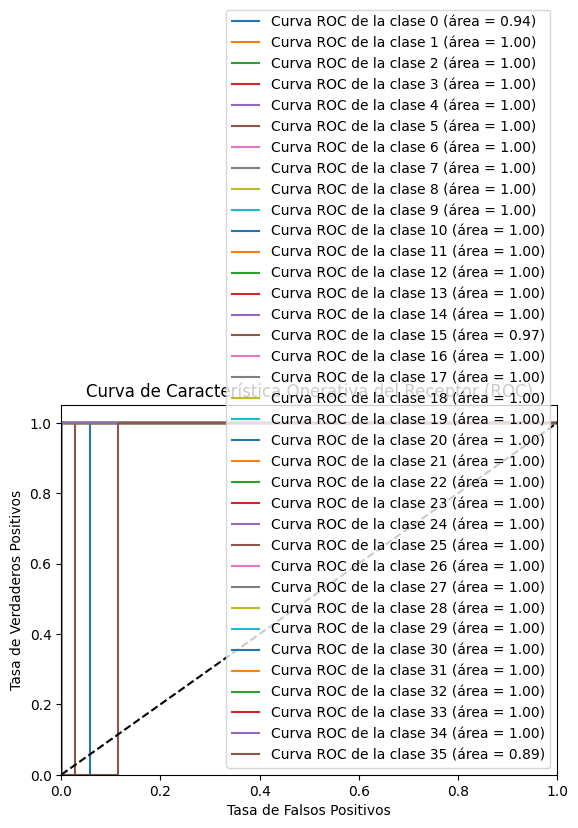

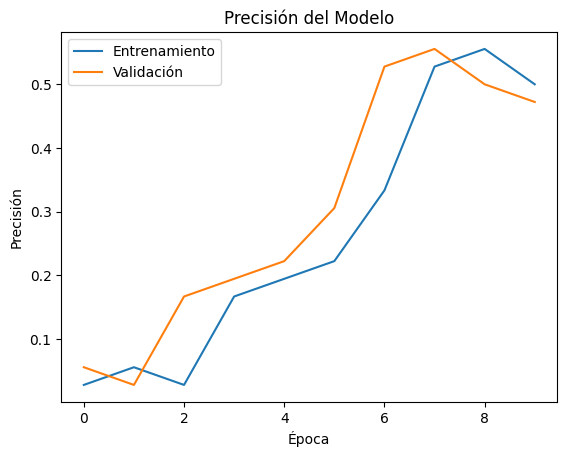

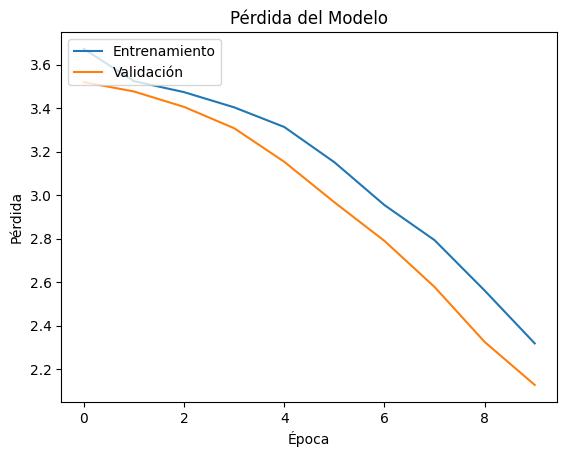

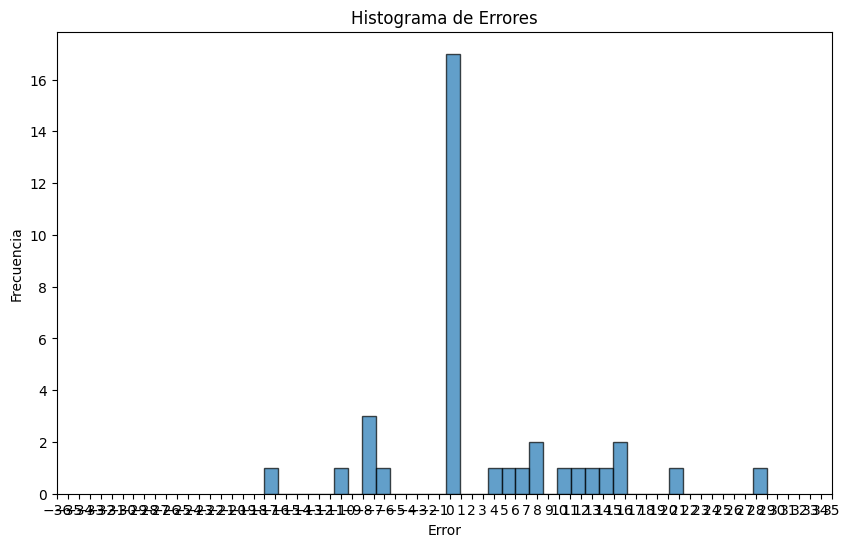

In [83]:
# Binarizar las etiquetas
validation_labels_bin = label_binarize(validation_labels, classes=np.arange(len(label_encoder.classes_)))
# Calcular las curvas ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(validation_labels_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure()
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de la clase {0} (área = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva de Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Graficar valores de precisión en entrenamiento y validación
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Graficar valores de pérdida en entrenamiento y validación
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Calcular los errores
# Ensure you are using predictions from the validation set here as well.
errores = true_labels - predicted_labels

# Graficar el histograma de errores
plt.figure(figsize=(10, 6))
plt.hist(errores, bins=len(label_encoder.classes_), edgecolor='black', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.xticks(np.arange(-len(label_encoder.classes_), len(label_encoder.classes_)))
plt.show()


